In [1]:
import pandas

movies = pandas.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')
ratings = pandas.read_csv(filepath_or_buffer='ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users = pandas.read_csv(filepath_or_buffer='users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

merge = pandas.merge(pandas.merge(ratings, users, on='UserID'), movies, on='MovieID')

print(merge)

         UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code  \
0             1     1193       5  978300760      F    1          10    48067   
1             2     1193       5  978298413      M   56          16    70072   
2            12     1193       4  978220179      M   25          12    32793   
3            15     1193       4  978199279      M   25           7    22903   
4            17     1193       5  978158471      M   50           1    95350   
...         ...      ...     ...        ...    ...  ...         ...      ...   
1000204    5949     2198       5  958846401      M   18          17    47901   
1000205    5675     2703       3  976029116      M   35          14    30030   
1000206    5780     2845       1  958153068      M   18          17    92886   
1000207    5851     3607       5  957756608      F   18          20    55410   
1000208    5938     2909       4  957273353      M   25           1    35401   

                                       

In [2]:
age_group_list=[1,18,25,35,45,50,56]

def top_by_age_for_gender(data, gender):

    result = {}

    gender_data = data[data['Gender'] == gender]

    for index, age_group in enumerate(age_group_list):

        gender_data_for_age = gender_data[gender_data["Age"] == age_group]

        rating_count = gender_data_for_age.groupby(['MovieID'])['Rating'].count()
        valid_movie_ids = rating_count[rating_count >= 20].index.tolist()
        valid_data = gender_data_for_age[gender_data_for_age['MovieID'].isin(valid_movie_ids)]

        rating = valid_data.groupby(['MovieID'])['Rating'].mean().nlargest(10)
        result[f'{age_group_list[index]}'] = rating
    return result

data = top_by_age_for_gender(merge, 'F')
print(data)

{'1': MovieID
919     4.360000
1028    4.318182
2396    4.272727
1197    4.238095
2762    4.225806
3114    4.222222
3408    4.190476
1073    4.166667
260     4.160000
364     4.080000
Name: Rating, dtype: float64, '18': MovieID
1148    4.693878
50      4.618557
745     4.611111
318     4.603306
1223    4.600000
2324    4.592593
1449    4.520000
720     4.481481
2858    4.467742
910     4.448276
Name: Rating, dtype: float64, '25': MovieID
745     4.793651
720     4.757576
3307    4.714286
1223    4.711111
2186    4.657895
1148    4.650602
3429    4.606061
318     4.605150
2762    4.605042
922     4.583333
Name: Rating, dtype: float64, '35': MovieID
922     4.655172
527     4.627273
745     4.604651
919     4.584071
1207    4.583333
720     4.571429
898     4.514286
50      4.500000
2788    4.500000
2762    4.489051
Name: Rating, dtype: float64, '45': MovieID
527     4.704225
2762    4.603774
1233    4.555556
318     4.548387
910     4.516129
920     4.510638
905     4.500000
930     4.5

In [3]:
def print_rating(data):
    for i, rating_by_age in enumerate(data.items()):
        print(f'For age group: {rating_by_age[0]}')
        for j, (movie_id, rating) in enumerate(rating_by_age[1].items()):
            movie_title = movies[movies['MovieID'] == movie_id]['Title'].values[0]
            print(f'    {j+1}) {movie_title} {round(rating,1)}')

print_rating(data)

For age group: 1
    1) Wizard of Oz, The (1939) 4.4
    2) Mary Poppins (1964) 4.3
    3) Shakespeare in Love (1998) 4.3
    4) Princess Bride, The (1987) 4.2
    5) Sixth Sense, The (1999) 4.2
    6) Toy Story 2 (1999) 4.2
    7) Erin Brockovich (2000) 4.2
    8) Willy Wonka and the Chocolate Factory (1971) 4.2
    9) Star Wars: Episode IV - A New Hope (1977) 4.2
    10) Lion King, The (1994) 4.1
For age group: 18
    1) Wrong Trousers, The (1993) 4.7
    2) Usual Suspects, The (1995) 4.6
    3) Close Shave, A (1995) 4.6
    4) Shawshank Redemption, The (1994) 4.6
    5) Grand Day Out, A (1992) 4.6
    6) Life Is Beautiful (La Vita è bella) (1997) 4.6
    7) Waiting for Guffman (1996) 4.5
    8) Wallace & Gromit: The Best of Aardman Animation (1996) 4.5
    9) American Beauty (1999) 4.5
    10) Some Like It Hot (1959) 4.4
For age group: 25
    1) Close Shave, A (1995) 4.8
    2) Wallace & Gromit: The Best of Aardman Animation (1996) 4.8
    3) City Lights (1931) 4.7
    4) Grand Day 

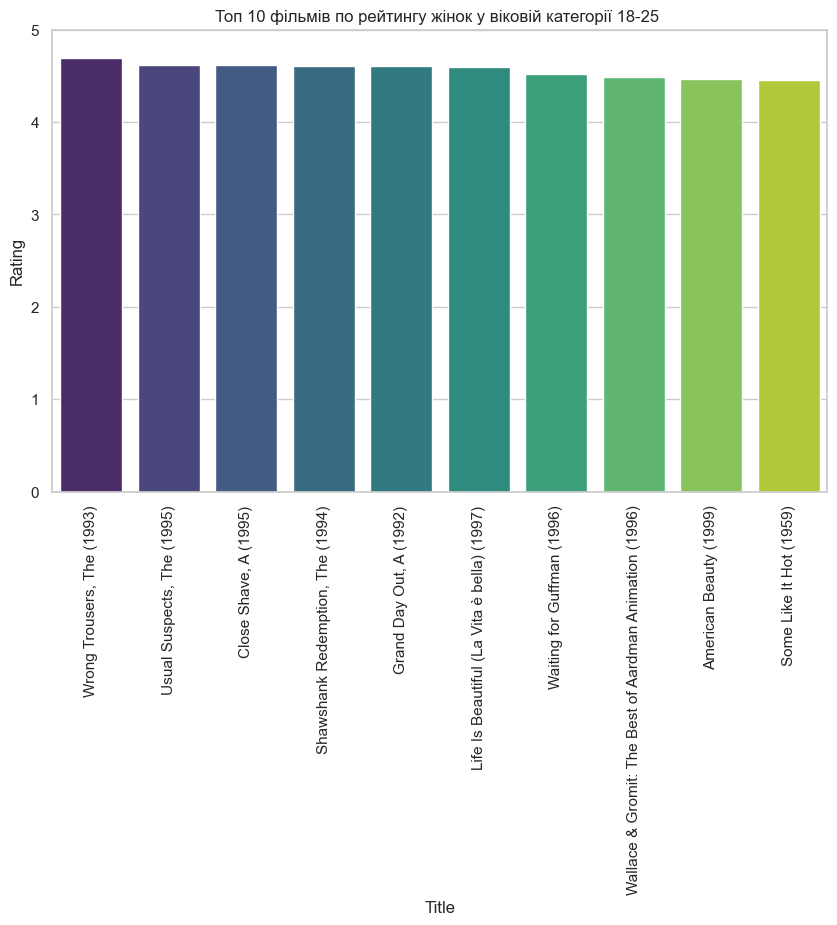

In [4]:
import pandas
import seaborn
import matplotlib.pyplot as pyplot

index = movies.set_index('MovieID')['Title']

random_rating = list(data.items())[1][1].to_frame()

index_data = pandas.DataFrame(index.get(random_rating.index))

#.reset_index() перетворює MovieID з індексу на стовпчик
graph_data = pandas.merge(index_data, random_rating.reset_index(), on='MovieID')

seaborn.set(style="whitegrid")
pyplot.figure(figsize=(10, 6))

plot = seaborn.barplot(x='Title', y='Rating', data=graph_data, palette='viridis')
plot.set(xlabel='Title', ylabel='Rating')
plot.set_title('Топ 10 фільмів по рейтингу жінок у віковій категорії 18-25 ')
plot.set_ylim(0, 5)
pyplot.xticks(rotation=90)

pyplot.show()
